# Project: Yes Bank Stock Closing Price Prediction Using Regression





## Sanskruti Bhosale
### DS24MS29


### Introduction to the Yes Bank Dataset
The Yes Bank stock dataset provides monthly records of the bank’s stock performance since its inception. It contains columns for each month, including:

Open: The price at which the stock opened at the beginning of the month.

High: The maximum price reached during the month.

Low: The minimum price recorded during the month.

Close: The price at which the stock closed at the end of the month.

#### Problem Statement 
Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to
see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. **The main objective is to predict the stock’s closing price of the month.**

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



**Description** 

Open: The price at which the stock opened at the beginning of the month.

High: The maximum price reached during the month.

Low: The minimum price recorded during the month.

Close: The price at which the stock closed at the end of the month.

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/Sansa1b/ml-project/main/data_YesBank.csv")
df.head()


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


**Making the column names more descriptive for better understanding**

Open: Opening_Price

High: Highest_Price

Low: Lowest_Price

Close: Closing_Price

In [8]:
#changing column names
df = df.rename(columns={
    "Date": "Date",
    "Open": "Opening_Price",
    "High": "Highest_Price",
    "Low": "Lowest_Price",
    "Close": "Closing_Price"
})
df.columns



Index(['Date', 'Opening_Price', 'Highest_Price', 'Lowest_Price',
       'Closing_Price'],
      dtype='object')

In [9]:
df.shape

(185, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           185 non-null    object 
 1   Opening_Price  185 non-null    float64
 2   Highest_Price  185 non-null    float64
 3   Lowest_Price   185 non-null    float64
 4   Closing_Price  185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [11]:

# Check for missing values
df.isnull().sum()



Date             0
Opening_Price    0
Highest_Price    0
Lowest_Price     0
Closing_Price    0
dtype: int64

In [12]:
# Convert Date to datetime and reformat to dd-mm-yyyy
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Check the result
print(df['Date'].head())
df.head()



0   2005-07-01
1   2005-08-01
2   2005-09-01
3   2005-10-01
4   2005-11-01
Name: Date, dtype: datetime64[ns]


,Date,Opening_Price,Highest_Price,Lowest_Price,Closing_Price
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [13]:
# Extract useful date-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
#df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df.head()


,Date,Opening_Price,Highest_Price,Lowest_Price,Closing_Price,Year,Month,DayOfWeek
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7,4
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8,0
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9,3
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10,5
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11,1


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           185 non-null    datetime64[ns]
 1   Opening_Price  185 non-null    float64       
 2   Highest_Price  185 non-null    float64       
 3   Lowest_Price   185 non-null    float64       
 4   Closing_Price  185 non-null    float64       
 5   Year           185 non-null    int32         
 6   Month          185 non-null    int32         
 7   DayOfWeek      185 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(3)
memory usage: 9.5 KB


In [15]:
df.sample(5)

,Date,Opening_Price,Highest_Price,Lowest_Price,Closing_Price,Year,Month,DayOfWeek
152,2018-03-01,320.70,325.80,285.10,304.90,2018,3,3
31,2008-02-01,50.88,53.97,44.40,49.42,2008,2,4
180,2020-07-01,25.60,28.30,11.10,11.95,2020,7,2
127,2016-02-01,150.40,157.85,132.74,137.67,2016,2,0
60,2010-07-01,53.55,60.94,53.02,58.99,2010,7,3


## Exploratory Data Analysis
### Univariate Analysis
#### 1. Histogram

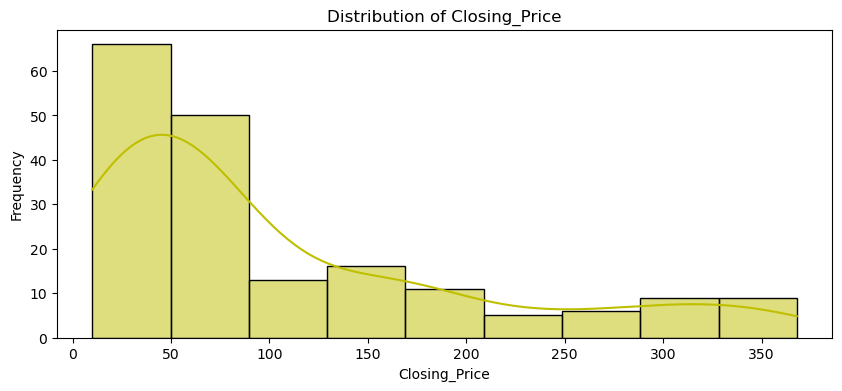

In [17]:
plt.figure(figsize = (10,4))
sns.histplot(df['Closing_Price'], kde=True , color = 'y')
plt.xlabel('Closing_Price')  # x-axis label
plt.ylabel('Frequency')  # y-axis label
plt.title(f'Distribution of Closing_Price')  # plot title
plt.show()

*Observation* :
The distribution is skewed to the right, meaning that most of the closing prices are on the lower side, while there are fewer values of very high closing prices.

#### 2. Pie chart 

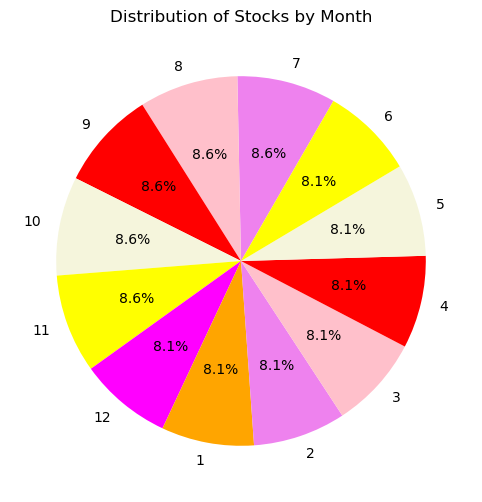

In [20]:
plt.figure(figsize=(8,6))
df['Month'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=60, colors=['violet', 'pink', 'red', 'beige', 'yellow', 'magenta', 'orange'])
plt.title('Distribution of Stocks by Month')
plt.ylabel('')
plt.show()

*Observation* :
1. While the pie chart gave me a visual distribution of how the data is spread across different months but it was not the most informative for finding in any major difference in month wise stock price fluctuations

2. The stock data is fairly evenly distributed across all the months.









#### 3. Bar Plot

**By Year**

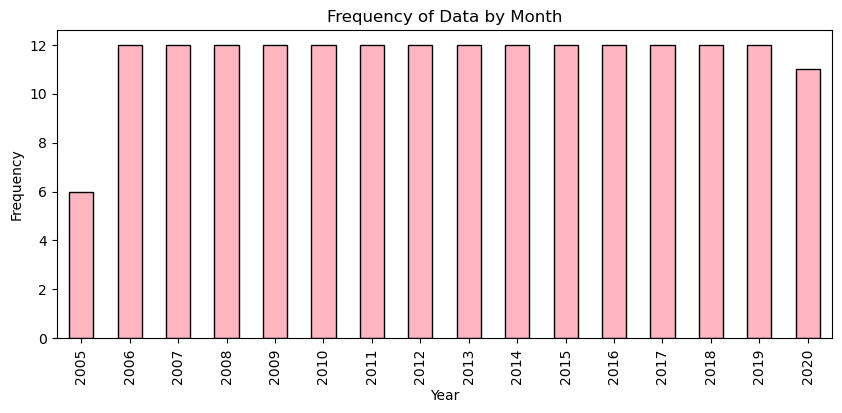

In [24]:
plt.figure(figsize = (10,4))
df['Year'].value_counts().sort_index().plot(kind='bar', color='lightpink', edgecolor='black')
plt.title('Frequency of Data by Month')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

*Observation* :

**Year**

The dataset has a consistent frequency from 2006 to 2019, with a well-balanced distribution throughout the period
2005 had the lowest frequency

**Month**

July, August, September, October, November have higher frequency than the rest


**By Month**

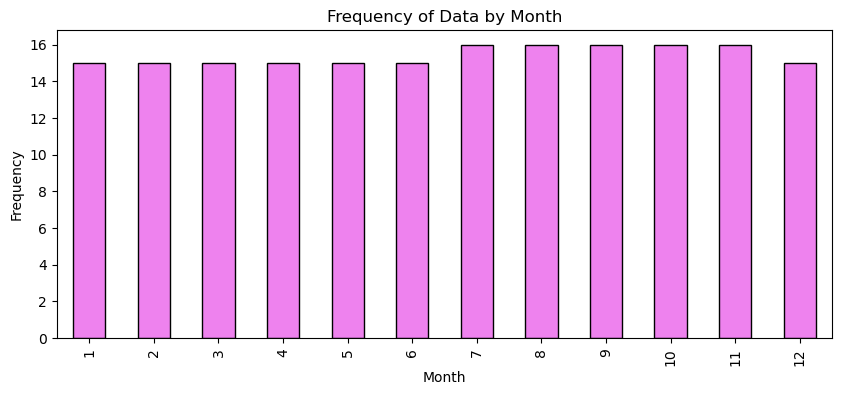

In [27]:
plt.figure(figsize = (10,4))
df['Month'].value_counts().sort_index().plot(kind='bar', color='violet', edgecolor='black')
plt.title('Frequency of Data by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

### Bivariate Analysis
#### 1. Scatter plot

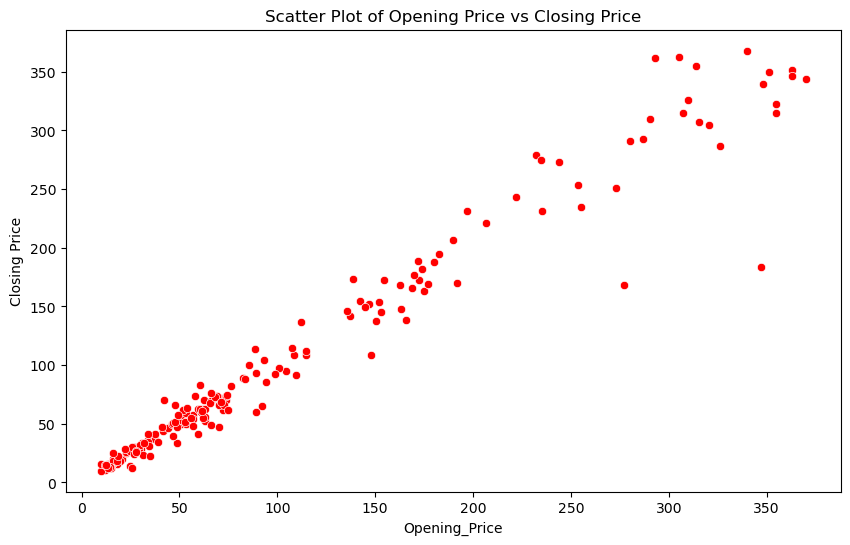

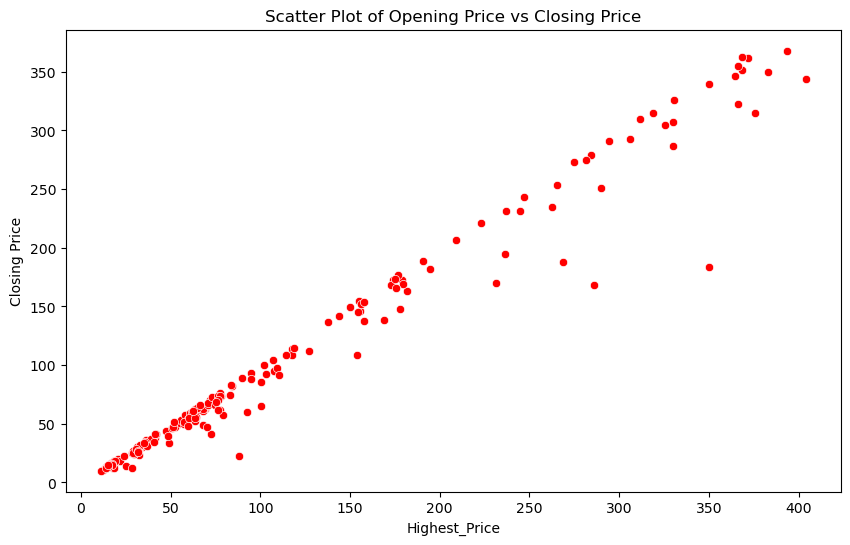

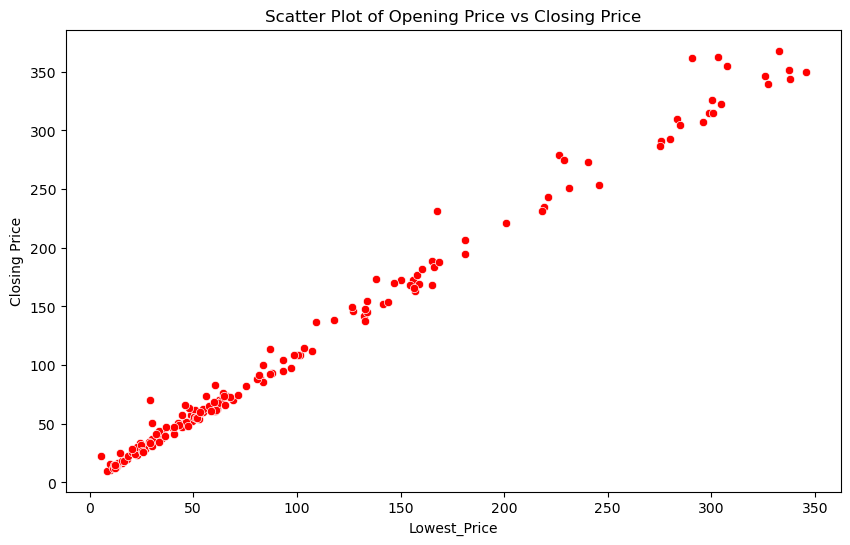

In [29]:

#Scatter Plots

# Scatter plot between i(open,high,low) and Closing_Price
for i in ['Opening_Price','Highest_Price', 'Lowest_Price']:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[i], y=df['Closing_Price'], color = 'red')

    plt.title('Scatter Plot of Opening Price vs Closing Price')
    plt.xlabel(i)
    plt.ylabel('Closing Price')
    plt.show()


**Observation**:

Positive correlation is present between all the columns against closing price. 

#### 2. Line Plot

**This is for closing price for better visual understanding when we also see high and low line plot below**


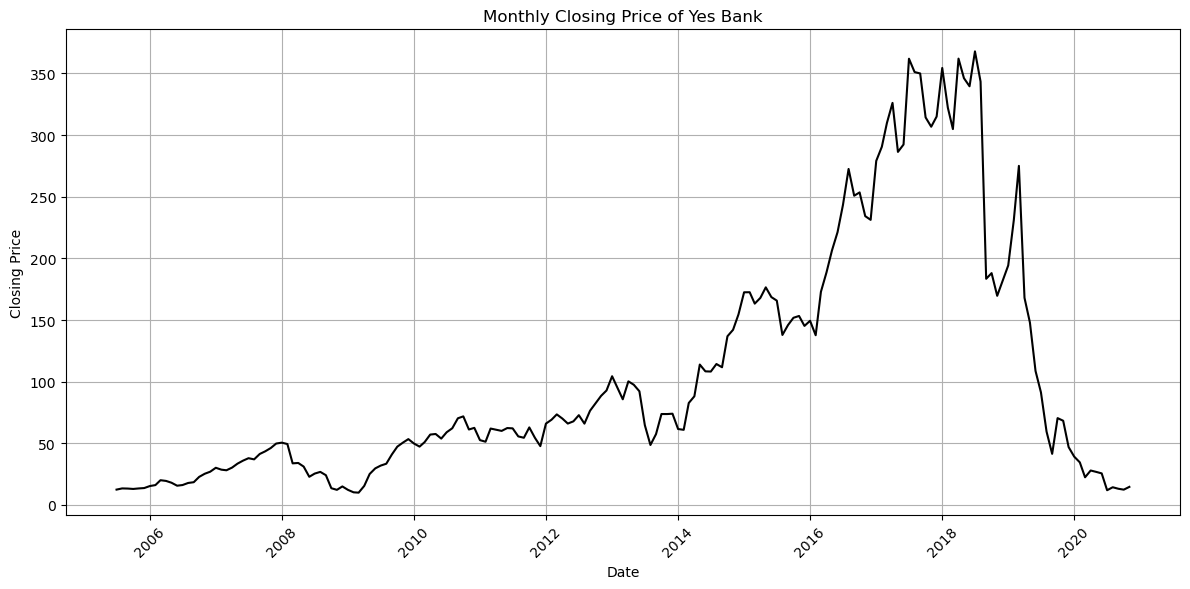

In [33]:
# Line plot of Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Closing_Price'], color='black')
plt.title('Monthly Closing Price of Yes Bank')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**High and Low**

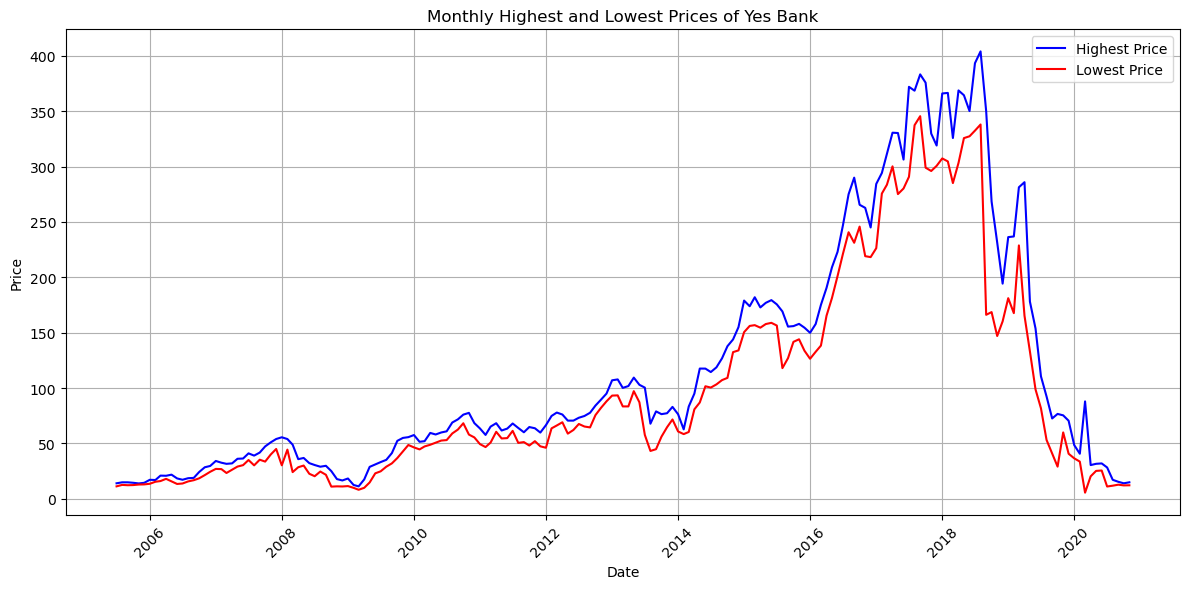

In [35]:
# Line plot of Closing Prices
plt.figure(figsize=(12, 6))
# I am Plotting 'Highest_Price' and 'Lowest_Price' on the same plot
plt.plot(df['Date'], df['Highest_Price'], color='blue', label='Highest Price')
plt.plot(df['Date'], df['Lowest_Price'], color='red', label='Lowest Price')
plt.title('Monthly Highest and Lowest Prices of Yes Bank')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Adding a legend to differentiate between the two lines
plt.legend()

plt.show()


#### 3. Bar Plot

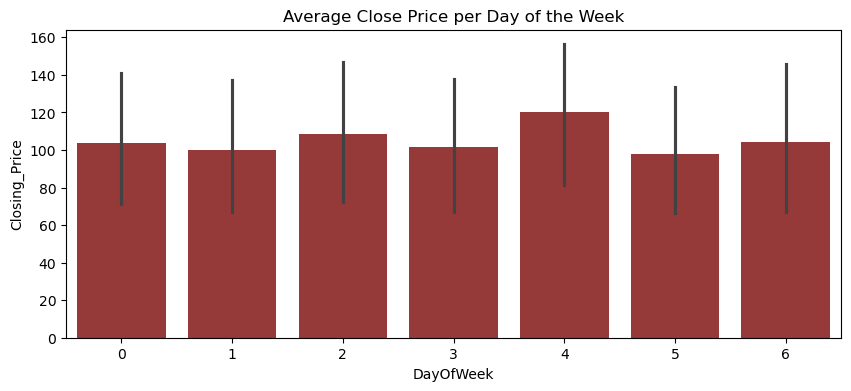

In [37]:
plt.figure(figsize = (10,4))
sns.barplot(x='DayOfWeek', y='Closing_Price',color='brown', data=df)
plt.title('Average Close Price per Day of the Week')
plt.show()


**Observation** :

Here I have used SNS to plot the bar. Here, as you can see, the closing price is highest on Friday just before the weekend and lowest on Saturday.

### Multivariate Analysis
#### 1. Violin Plot

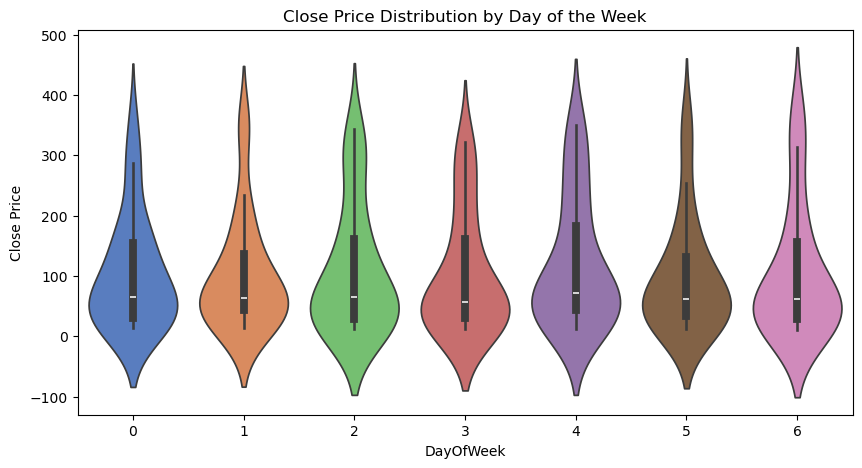

In [40]:
plt.figure(figsize=(10,5))
sns.violinplot(x='DayOfWeek', y='Closing_Price', palette='muted', data=df)
plt.title('Close Price Distribution by Day of the Week')
plt.xlabel('DayOfWeek')
plt.ylabel('Close Price')
plt.show()

**Observation** :

No Major Difference is seen, as the median is not showing much change across all the days.

#### 2. Pair Plot

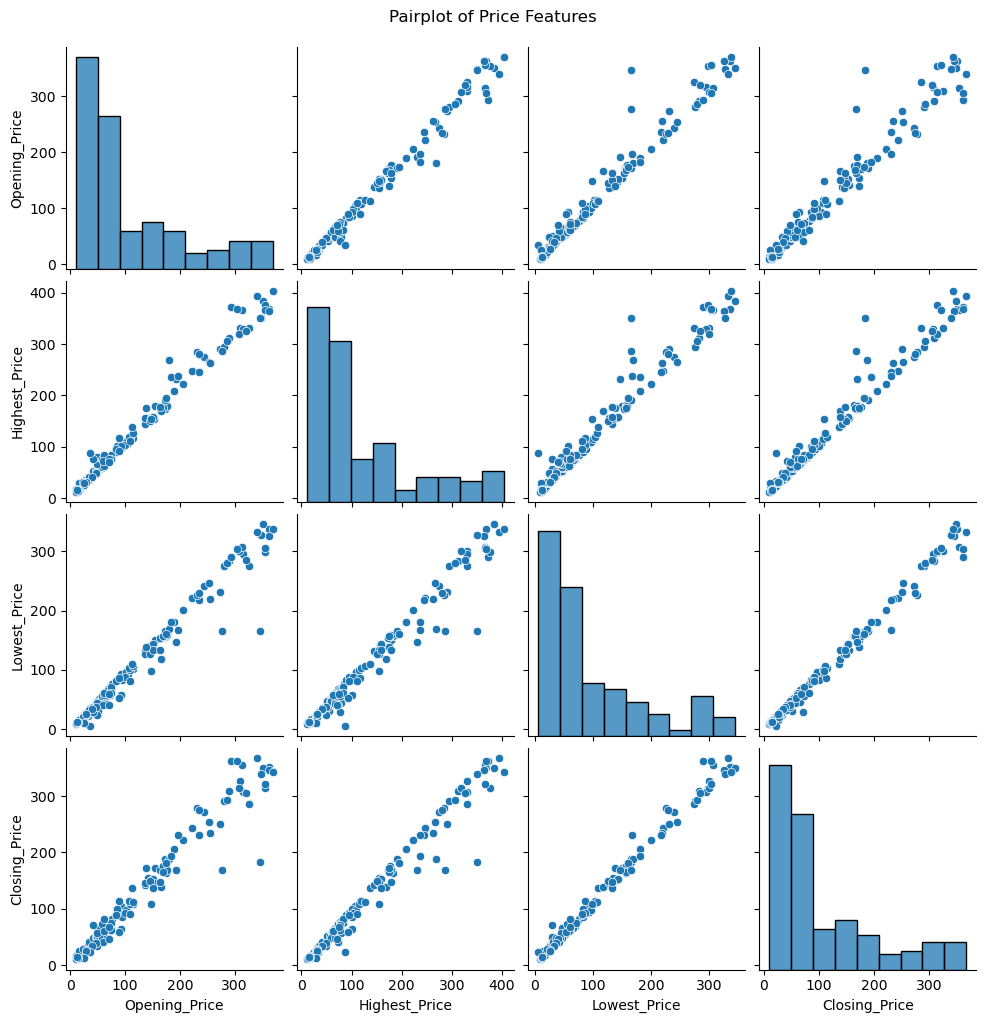

In [43]:
# Multivariate Analysis - Pairplot
sns.pairplot(df[['Opening_Price', 'Highest_Price', 'Lowest_Price', 'Closing_Price']])
plt.suptitle('Pairplot of Price Features', y=1.02) #this y keeps the title from overlapping on the graph
plt.show()

#### 3. HeatMap

In [45]:
# Correlation matrix
correlation_matrix = df[['Opening_Price', 'Highest_Price', 'Lowest_Price', 'Closing_Price']].corr()
print(correlation_matrix)

               Opening_Price  Highest_Price  Lowest_Price  Closing_Price
Opening_Price       1.000000       0.993040      0.983978       0.977971
Highest_Price       0.993040       1.000000      0.983422       0.985051
Lowest_Price        0.983978       0.983422      1.000000       0.995358
Closing_Price       0.977971       0.985051      0.995358       1.000000


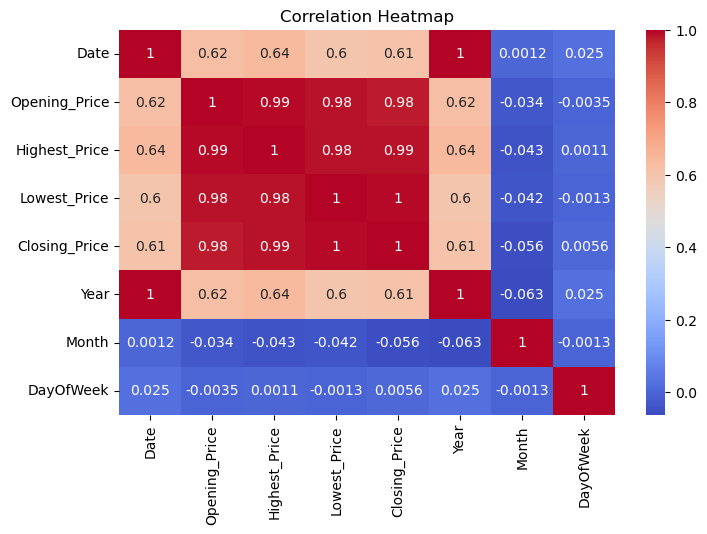

In [46]:
# Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Observation** :

Opening_Price , Highest_Price , Lowest_Price , Closing_Price are highly correlated to each other

## Outlier detection
#### Boxplot

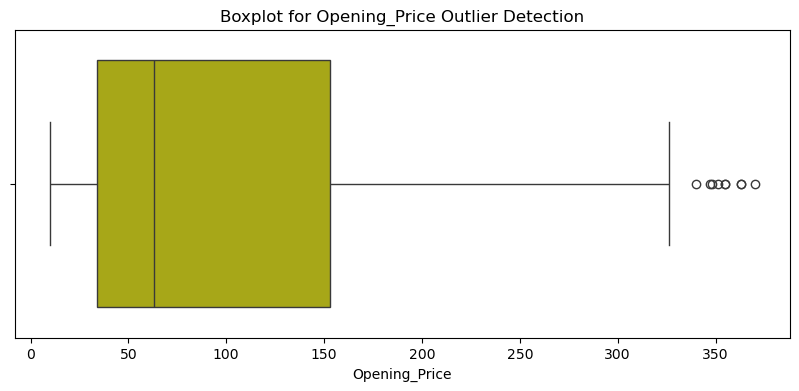

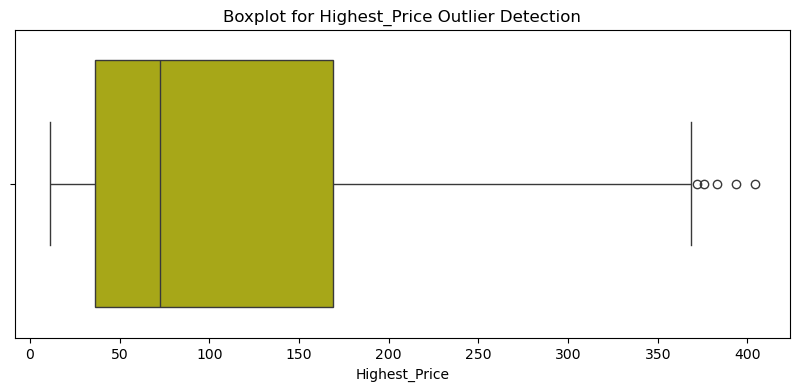

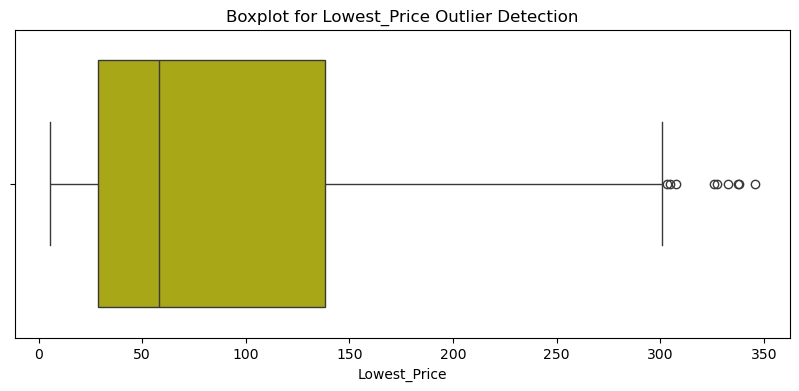

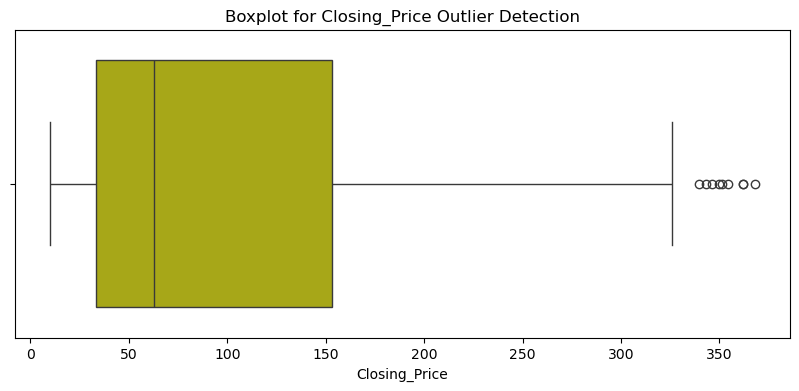

In [49]:
 # outlier detection
for i in ['Opening_Price', 'Highest_Price', 'Lowest_Price', 'Closing_Price']:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x = df[i] ,color = 'y')
    plt.title(f"Boxplot for {i} Outlier Detection" )
    plt.show()

In [50]:
df = df[df['Opening_Price'] < 300 ]
print(df)


          Date  Opening_Price  Highest_Price  Lowest_Price  Closing_Price  \
0   2005-07-01          13.00          14.00         11.25          12.46   
1   2005-08-01          12.58          14.88         12.55          13.42   
2   2005-09-01          13.48          14.87         12.27          13.30   
3   2005-10-01          13.20          14.47         12.40          12.99   
4   2005-11-01          13.35          13.88         12.88          13.41   
..         ...            ...            ...           ...            ...   
180 2020-07-01          25.60          28.30         11.10          11.95   
181 2020-08-01          12.00          17.16         11.85          14.37   
182 2020-09-01          14.30          15.34         12.75          13.15   
183 2020-10-01          13.30          14.01         12.11          12.42   
184 2020-11-01          12.41          14.90         12.21          14.67   

     Year  Month  DayOfWeek  
0    2005      7          4  
1    2005      

In [51]:
df = df[df['Highest_Price'] < 350 ]

In [52]:
df = df[df['Lowest_Price'] < 300 ]

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 184
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           168 non-null    datetime64[ns]
 1   Opening_Price  168 non-null    float64       
 2   Highest_Price  168 non-null    float64       
 3   Lowest_Price   168 non-null    float64       
 4   Closing_Price  168 non-null    float64       
 5   Year           168 non-null    int32         
 6   Month          168 non-null    int32         
 7   DayOfWeek      168 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(3)
memory usage: 9.8 KB


In [54]:
df = df.drop(['Date'], axis = 1) # Of no use

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Opening_Price,168.0,82.395952,69.655321,10.00,30.0750,60.460,110.2250,290.60
Highest_Price,168.0,91.554762,76.161784,11.24,33.0200,67.905,117.8725,311.57
Lowest_Price,168.0,73.991964,64.832709,5.55,25.4625,52.320,100.7350,283.60
Closing_Price,168.0,82.897857,71.270517,9.98,30.0400,60.510,109.4500,309.82
Year,168.0,2012.214286,4.403514,2005.00,2008.7500,2012.000,2015.2500,2020.00
Month,168.0,6.571429,3.482327,1.00,3.7500,7.000,10.0000,12.00
DayOfWeek,168.0,3.023810,1.999857,0.00,1.0000,3.000,5.0000,6.00


## Skweness and Kurtosis

In [57]:
# Skewness and Kurtosis Check
print("Skewness of Numerical Features:")
print(df[['Opening_Price', 'Highest_Price', 'Lowest_Price', 'Closing_Price']].skew())

print("\nKurtosis of Numerical Features:")
print(df[['Opening_Price', 'Highest_Price', 'Lowest_Price', 'Closing_Price']].kurt())

Skewness of Numerical Features:
Opening_Price    1.277587
Highest_Price    1.273321
Lowest_Price     1.350646
Closing_Price    1.335526
dtype: float64

Kurtosis of Numerical Features:
Opening_Price    0.852218
Highest_Price    0.757515
Lowest_Price     1.184983
Closing_Price    1.059652
dtype: float64


## Model Preparation

In [59]:
X = df.drop(['Closing_Price'], axis = 1).values
y = df['Closing_Price'].values



In [60]:
# Split the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
X

array([[1.300e+01, 1.400e+01, 1.125e+01, 2.005e+03, 7.000e+00, 4.000e+00],
       [1.258e+01, 1.488e+01, 1.255e+01, 2.005e+03, 8.000e+00, 0.000e+00],
       [1.348e+01, 1.487e+01, 1.227e+01, 2.005e+03, 9.000e+00, 3.000e+00],
       ...,
       [1.430e+01, 1.534e+01, 1.275e+01, 2.020e+03, 9.000e+00, 1.000e+00],
       [1.330e+01, 1.401e+01, 1.211e+01, 2.020e+03, 1.000e+01, 3.000e+00],
       [1.241e+01, 1.490e+01, 1.221e+01, 2.020e+03, 1.100e+01, 6.000e+00]])

In [62]:
y

array([ 12.46,  13.42,  13.3 ,  12.99,  13.41,  13.71,  15.33,  16.12,
        20.08,  19.49,  18.03,  15.62,  16.16,  17.84,  18.46,  22.78,
        25.32,  26.97,  30.16,  28.63,  28.14,  30.31,  33.51,  35.98,
        37.93,  36.99,  41.36,  43.48,  46.18,  49.81,  50.54,  49.42,
        33.75,  34.06,  31.13,  22.85,  25.45,  26.83,  24.13,  13.58,
        12.26,  15.03,  12.24,  10.26,   9.98,  15.45,  25.12,  29.68,
        31.93,  33.45,  40.99,  47.31,  50.57,  53.41,  49.84,  47.32,
        50.97,  57.1 ,  57.57,  53.83,  58.99,  62.22,  70.3 ,  71.86,
        61.21,  62.54,  52.59,  51.29,  61.98,  61.02,  60.07,  62.38,
        62.13,  55.61,  54.5 ,  62.9 ,  54.49,  47.72,  65.99,  69.14,
        73.46,  70.07,  66.02,  67.83,  72.85,  65.97,  76.44,  82.29,
        88.48,  92.84, 104.41,  94.5 ,  85.71, 100.28,  97.49,  92.2 ,
        64.76,  48.65,  57.5 ,  73.76,  73.74,  74.02,  61.59,  60.95,
        82.7 ,  88.14, 113.89, 108.38, 108.21, 114.33, 111.7 , 136.83,
      

In [63]:
X_train

array([[6.2000e+01, 6.8260e+01, 6.0500e+01, 2.0110e+03, 4.0000e+00,
        4.0000e+00],
       [2.5500e+02, 2.6272e+02, 2.1910e+02, 2.0160e+03, 1.1000e+01,
        1.0000e+00],
       [1.3480e+01, 1.4870e+01, 1.2270e+01, 2.0050e+03, 9.0000e+00,
        3.0000e+00],
       [8.5700e+01, 1.0180e+02, 8.3430e+01, 2.0130e+03, 4.0000e+00,
        0.0000e+00],
       [2.7330e+02, 2.9000e+02, 2.3120e+02, 2.0160e+03, 9.0000e+00,
        3.0000e+00],
       [8.9200e+01, 9.2400e+01, 5.3150e+01, 2.0190e+03, 8.0000e+00,
        3.0000e+00],
       [9.3200e+01, 1.0700e+02, 9.3200e+01, 2.0130e+03, 1.0000e+00,
        1.0000e+00],
       [1.5440e+02, 1.7900e+02, 1.5047e+02, 2.0150e+03, 1.0000e+00,
        3.0000e+00],
       [3.7400e+01, 4.1750e+01, 3.5300e+01, 2.0070e+03, 9.0000e+00,
        5.0000e+00],
       [1.7400e+02, 1.9430e+02, 1.6020e+02, 2.0180e+03, 1.2000e+01,
        5.0000e+00],
       [2.5341e+02, 2.6550e+02, 2.4580e+02, 2.0160e+03, 1.0000e+01,
        5.0000e+00],
       [6.6000e+01, 6

In [64]:
y_train

array([ 61.02, 234.28,  13.3 , 100.28, 250.85,  59.5 , 104.41, 172.5 ,
        41.36, 181.75, 253.52,  48.65,  62.54,  25.45, 149.38,  33.51,
        74.02,  22.45,  64.76,  15.62,  51.29, 243.44,  15.33,  43.48,
        65.99, 194.3 ,  24.13,  15.03,  13.41, 292.37,  33.75,  52.59,
       137.67,  92.2 ,  18.03,  73.74, 172.55,  12.46, 145.23, 167.96,
        61.21,   9.98, 165.74,  46.18,  12.26, 176.52,  36.99,  35.98,
       151.82,  70.07,  69.14,  72.85,  13.58,  97.49,  76.44, 142.08,
        11.95, 309.82,  29.68, 172.91,  62.22,  55.61,  34.06,  39.2 ,
       153.3 , 221.3 ,  70.3 ,  12.42,  82.7 , 279.1 ,  53.41,  13.71,
       145.92,  12.99,  68.3 ,  33.45,  22.85,  73.46,  47.72,  31.13,
        25.12,  16.12,  10.26,  60.07, 275.05, 111.7 ,  94.5 ,  67.83,
       108.7 ,  70.45,  92.84,  20.08,  27.95, 154.57,  17.84,  53.83,
       169.65,  26.97,  62.13, 231.2 , 290.56,  41.45,  71.86,  49.84,
       108.38,  40.99,  13.15,  57.57,  31.93,  88.48,  30.31,  57.1 ,
      

## Feature Scaling

In [66]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [67]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 184
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Opening_Price  168 non-null    float64
 1   Highest_Price  168 non-null    float64
 2   Lowest_Price   168 non-null    float64
 3   Closing_Price  168 non-null    float64
 4   Year           168 non-null    int32  
 5   Month          168 non-null    int32  
 6   DayOfWeek      168 non-null    int32  
dtypes: float64(4), int32(3)
memory usage: 8.5 KB


## Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression

# Linear Regression Model

lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression()

#### Predicting the result

In [72]:
# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([233.47887088,  37.88162777, 167.9572169 ,  51.43320833,
       230.98855185,  27.7220581 ,  14.16815528,  45.41005664,
        91.03944599,  59.56261056,  22.73732531,  44.61403395,
       268.85390097,  15.17713631,  61.28401286,  69.26402846,
        39.92052298, 114.19181461,  57.07125588, 108.33685871,
        30.35367609,  25.78571649,  49.38177339,  32.91724223,
        15.68437868,  19.76836794,  62.31142901,  65.25985282,
        55.44059216,  48.54172786,  14.77330249,  51.88940827,
       190.19225905, 129.0171112 ])

In [73]:
y_train

array([ 61.02, 234.28,  13.3 , 100.28, 250.85,  59.5 , 104.41, 172.5 ,
        41.36, 181.75, 253.52,  48.65,  62.54,  25.45, 149.38,  33.51,
        74.02,  22.45,  64.76,  15.62,  51.29, 243.44,  15.33,  43.48,
        65.99, 194.3 ,  24.13,  15.03,  13.41, 292.37,  33.75,  52.59,
       137.67,  92.2 ,  18.03,  73.74, 172.55,  12.46, 145.23, 167.96,
        61.21,   9.98, 165.74,  46.18,  12.26, 176.52,  36.99,  35.98,
       151.82,  70.07,  69.14,  72.85,  13.58,  97.49,  76.44, 142.08,
        11.95, 309.82,  29.68, 172.91,  62.22,  55.61,  34.06,  39.2 ,
       153.3 , 221.3 ,  70.3 ,  12.42,  82.7 , 279.1 ,  53.41,  13.71,
       145.92,  12.99,  68.3 ,  33.45,  22.85,  73.46,  47.72,  31.13,
        25.12,  16.12,  10.26,  60.07, 275.05, 111.7 ,  94.5 ,  67.83,
       108.7 ,  70.45,  92.84,  20.08,  27.95, 154.57,  17.84,  53.83,
       169.65,  26.97,  62.13, 231.2 , 290.56,  41.45,  71.86,  49.84,
       108.38,  40.99,  13.15,  57.57,  31.93,  88.48,  30.31,  57.1 ,
      

###   Accuracy

In [75]:
print((lr.score(X_train, y_train))*100,"%")
print((lr.score(X_test, y_test))*100,"%")

99.37873565444745 %
98.00144033867349 %


### Difference

In [77]:
diff = pd.DataFrame({"Actual_value" : y_test, "Predicted_Value" : y_pred_lr.astype(int), "Difference" : abs(y_test - y_pred_lr)})
diff.sample(10)

,Actual_value,Predicted_Value,Difference
11,46.95,44,2.335966
26,66.02,62,3.708571
19,108.21,108,0.126859
22,49.42,49,0.038227
10,22.78,22,0.042675
24,16.16,15,0.475621
4,188.05,230,42.938552
32,168.00,190,22.192259
2,168.60,167,0.642783
0,231.26,233,2.218871


### Visualizing through scatter plot


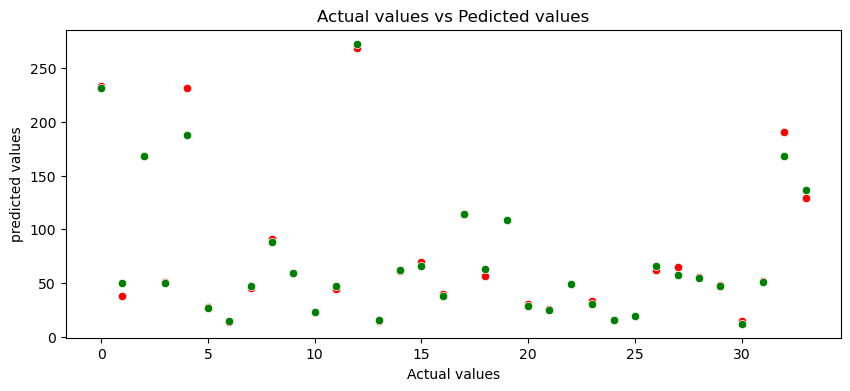

In [79]:
plt.figure(figsize = (10,4))
sns.scatterplot(y_pred_lr, color = 'r')
sns.scatterplot(y_test, color = 'g')
plt.title('Actual values vs Pedicted values')
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.show()

In [80]:
# Importing Evaluation metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Mean Absolute Error
print("MAE :", mean_absolute_error(y_test, y_pred_lr))

# Mean Squared Error
MSE = mean_squared_error(y_test, y_pred_lr)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test, y_pred_lr)
print("R2 Linear regression in % :" ,r2*100) #in percentage
print("R2 Linear regression in scrore:" ,r2) #in score


MAE : 4.05285507372016
MSE : 80.64431138151708
RMSE : 8.980217780294478
R2 Linear regression in % : 98.00144033867349
R2 Linear regression in scrore: 0.9800144033867348


## Decision Tree Regressor

In [82]:
# Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

#### Predicting the result

In [84]:
# Predictions
y_pred_dt = dt.predict(X_test)
y_train_dt = dt.predict(X_train)

In [85]:
#Mean Absolute Error
print("MAE :", mean_absolute_error(y_test, y_pred_dt))

# Mean Squared Error
MSE = mean_squared_error(y_test, y_pred_dt)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test, y_pred_dt)
print("R2 Linear regression in % :" ,r2*100) #in percentage
print("R2 Linear regression in scrore:" ,r2) #in score


MAE : 8.697058823529414
MSE : 416.2595529411766
RMSE : 20.40243987716118
R2 Linear regression in % : 89.68408884770123
R2 Linear regression in scrore: 0.8968408884770123


### Accuracy

In [87]:
print("Trainig Score: ",(dt.score(X_train, y_train))*100,"%")
print("Testing Score: ",(dt.score(X_test, y_test))*100,"%")

Trainig Score:  100.0 %
Testing Score:  89.68408884770123 %


### Difference

In [89]:
diff = pd.DataFrame({"Actual_value" : y_test, "Predicted_Value" : y_pred_dt.astype(int), "Difference" : abs(y_test - y_pred_lr)})
diff.sample(10)

,Actual_value,Predicted_Value,Difference
13,15.45,15,0.272864
4,188.05,188,42.938552
22,49.42,51,0.038227
5,26.85,25,0.872058
16,37.93,34,1.990523
1,50.54,39,12.658372
17,114.33,108,0.138185
18,62.90,52,5.828744
12,272.56,250,3.706099
20,28.63,33,1.723676


### Visualizing through scatter plot


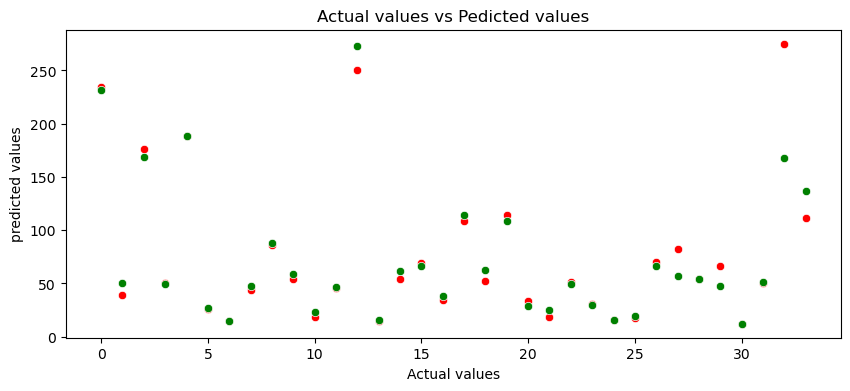

In [91]:
plt.figure(figsize = (10,4))
sns.scatterplot(y_pred_dt, color = 'r')
sns.scatterplot(y_test, color = 'g')
plt.title('Actual values vs Pedicted values')
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.show()

### Random Forest Regressor

In [93]:
# Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

#### Predicting the result

In [95]:
# Predictions

y_pred_rf = rf.predict(X_test)
y_pred_rf

array([237.6604,  44.1707, 175.5165,  50.9074, 207.028 ,  27.4907,
        13.4366,  43.7049,  90.7854,  57.3841,  19.4126,  48.8697,
       258.8616,  12.0173,  57.6172,  70.2464,  38.3936, 108.7371,
        54.535 , 108.7477,  30.6103,  22.2464,  49.5682,  31.2482,
        15.0749,  18.6509,  64.6984,  66.7133,  55.6531,  46.6955,
        12.842 ,  48.8931, 250.2294, 116.159 ])

### Accuracy

In [97]:
print("Trainig Score: ",(rf.score(X_train, y_train))*100,"%")
print("Testing Score: ",(rf.score(X_test, y_test))*100,"%")

Trainig Score:  99.78618464561609 %
Testing Score:  94.04741305532238 %


### Difference

In [99]:
diff = pd.DataFrame({"Actual_value" : y_test, "Predicted_Value" : y_pred_rf.astype(int), "Difference" : abs(y_test - y_pred_rf)})
diff.sample(10)

,Actual_value,Predicted_Value,Difference
13,15.45,12,3.4327
12,272.56,258,13.6984
26,66.02,64,1.3216
25,19.49,18,0.8391
6,14.37,13,0.9334
3,49.81,50,1.0974
8,88.14,90,2.6454
24,16.16,15,1.0851
1,50.54,44,6.3693
31,50.97,48,2.0769


In [100]:
#Mean Absolute Error
print("MAE :", mean_absolute_error(y_test, y_pred_rf))

# Mean Squared Error
MSE = mean_squared_error(y_test, y_pred_rf)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test, y_pred_rf)
print("R2 Linear regression in % :" ,r2*100) #in percentage
print("R2 Linear regression in scrore:" ,r2) #in score


MAE : 6.509558823529409
MSE : 240.1941179847053
RMSE : 15.498197249509547
R2 Linear regression in % : 94.04741305532238
R2 Linear regression in scrore: 0.9404741305532238


### Visualizing through scatter plot


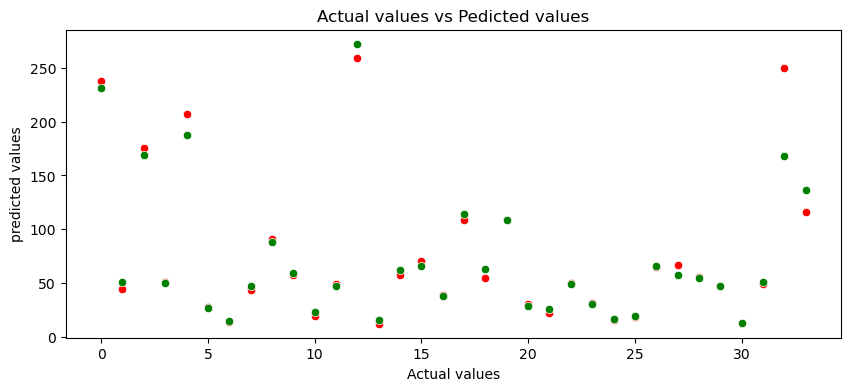

In [102]:
plt.figure(figsize = (10,4))
sns.scatterplot(y_pred_rf, color = 'r')
sns.scatterplot(y_test, color = 'g')
plt.title('Actual values vs Pedicted values')
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.show()

#### Support Vector Machine (SVM):

In [104]:
from sklearn.svm import SVR
#setting hyperparameter 
svm = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm.fit(X_train, y_train)


SVR(C=100, gamma=0.1)

#### Predicting the result

In [106]:
y_pred_svm = svm.predict(X_test)
y_pred_svm

array([217.99753484,  43.11261699, 161.65342349,  50.55456253,
       175.31814248,  18.89639109,   8.49728655,  43.9861621 ,
        86.83049822,  60.03408417,  26.36399799,  48.90237113,
       228.59693947,  15.94887138,  57.87407207,  72.43095024,
        40.95504176, 111.81791269,  55.46830961, 108.38035635,
        28.5714441 ,  23.00898849,  46.71249702,  35.62134309,
        16.67467293,  18.46366841,  64.90957223,  55.80240944,
        59.17492846,  49.28420494,  17.40268863,  50.43977793,
       195.32682216, 124.53955199])

### Accuracy

In [108]:
print("Trainig Score: ",(svm.score(X_train, y_train))*100,"%")
print("Testing Score: ",(svm.score(X_test, y_test))*100,"%")

Trainig Score:  99.38191554839071 %
Testing Score:  97.35335987142612 %


### Difference

In [110]:
diff = pd.DataFrame({"Actual_value" : y_test, "Predicted_Value" : y_pred_svm.astype(int), "Difference" : abs(y_test - y_pred_svm)})
diff.sample(10)

,Actual_value,Predicted_Value,Difference
14,61.98,57,4.105928
17,114.33,111,2.512087
7,47.31,43,3.323838
12,272.56,228,43.963061
13,15.45,15,0.498871
3,49.81,50,0.744563
5,26.85,18,7.953609
18,62.90,55,7.431690
25,19.49,18,1.026332
30,12.24,17,5.162689


In [111]:
#Mean Absolute Error
print("MAE :", mean_absolute_error(y_test, y_pred_svm))

# Mean Squared Error
MSE = mean_squared_error(y_test, y_pred_svm)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test, y_pred_svm)
print("R2 Linear regression in % :" ,r2*100) #in percentage
print("R2 Linear regression in scrore:" ,r2) #in score


MAE : 5.916696957250605
MSE : 106.79514591116309
RMSE : 10.33417369271308
R2 Linear regression in % : 97.35335987142612
R2 Linear regression in scrore: 0.9735335987142612


### Visualizing through scatter plot


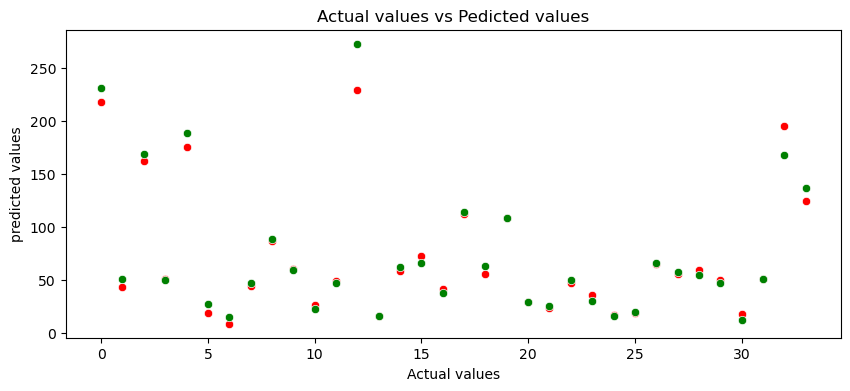

In [113]:
plt.figure(figsize = (10,4))
sns.scatterplot(y_pred_svm, color = 'r')
sns.scatterplot(y_test, color = 'g')
plt.title('Actual values vs Pedicted values')
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.show()

#### KNeighborsRegressor

In [115]:
from sklearn.neighbors import KNeighborsRegressor
#hyperparameters
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsRegressor()

#### Predicting the result

In [117]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([230.348,  31.012, 158.04 ,  35.468, 187.24 ,  21.864,  29.758,
        46.456,  86.582,  59.098,  27.128,  54.436, 261.724,  29.384,
        54.14 ,  61.918,  38.038, 118.89 ,  66.966, 104.03 ,  29.062,
        20.036,  44.284,  27.916,  23.316,  29.602,  66.508,  67.22 ,
        66.642,  48.366,  29.062,  40.474, 258.206, 128.63 ])

### Accuracy

In [119]:
print("Trainig Score: ",(knn.score(X_train, y_train))*100,"%")
print("Testing Score: ",(knn.score(X_test, y_test))*100,"%")

Trainig Score:  97.13400466040214 %
Testing Score:  92.31888196452581 %


### Difference

In [121]:
diff = pd.DataFrame({"Actual_value" : y_test, "Predicted_Value" : y_pred_knn.astype(int), "Difference" : abs(y_test - y_pred_knn)})
diff.sample(10)

,Actual_value,Predicted_Value,Difference
21,25.32,20,5.284
16,37.93,38,0.108
28,54.49,66,12.152
20,28.63,29,0.432
26,66.02,66,0.488
14,61.98,54,7.840
29,47.32,48,1.046
31,50.97,40,10.496
8,88.14,86,1.558
33,136.83,128,8.200


In [122]:
#Mean Absolute Error
print("MAE :", mean_absolute_error(y_test, y_pred_knn))

# Mean Squared Error
MSE = mean_squared_error(y_test, y_pred_knn)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test, y_pred_knn)
print("R2 Linear regression in % :" ,r2*100) #in percentage
print("R2 Linear regression in scrore:" ,r2) #in score


MAE : 9.116176470588236
MSE : 309.94244835294126
RMSE : 17.60518242884581
R2 Linear regression in % : 92.31888196452581
R2 Linear regression in scrore: 0.9231888196452581


### Visualizing through scatter plot


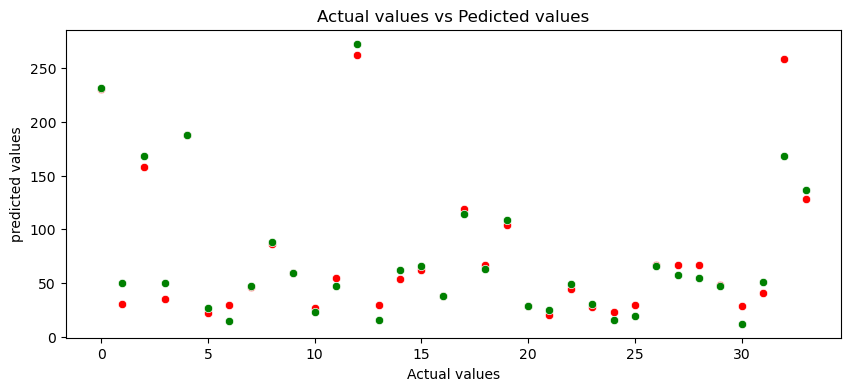

In [124]:
plt.figure(figsize = (10,4))
sns.scatterplot(y_pred_knn, color = 'r')
sns.scatterplot(y_test, color = 'g')
plt.title('Actual values vs Pedicted values')
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.show()

### Cross Validation

In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
# Cross-validation for Decision Tree (DT)
print("Decision Tree (DT):")
print("Training:", (cross_val_score(dt, X_train, y_train, cv=5).mean() * 100), "%")
print("Testing:", (cross_val_score(dt, X_test, y_test, cv=5).mean() * 100), "%")

# Cross-validation for Random Forest (RF)
print("\nRandom Forest (RF):")
print("Training:", (cross_val_score(rf, X_train, y_train, cv=5).mean() * 100), "%")
print("Testing:", (cross_val_score(rf, X_test, y_test, cv=5).mean() * 100), "%")

# Cross-validation for Linear Regression (LR)
print("\nLinear Regression (LR):")
print("Training:", (cross_val_score(lr, X_train, y_train, cv=5).mean() * 100), "%")
print("Testing:", (cross_val_score(lr, X_test, y_test, cv=5).mean() * 100), "%")

# Cross-validation for Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM):")
print("Training:", (cross_val_score(svm, X_train, y_train, cv=5).mean() * 100), "%")
print("Testing:", (cross_val_score(svm, X_test, y_test, cv=5).mean() * 100), "%")

# Cross-validation for KNeighborsRegressor 
print("\nKNeighborsRegressor (KNN):")
print("Training:", (cross_val_score(knn, X_train, y_train, cv=5).mean() * 100), "%")
print("Testing:", (cross_val_score(knn, X_test, y_test, cv=5).mean() * 100), "%")


Decision Tree (DT):
Training: 96.47336945724699 %
Testing: 90.01040891045315 %

Random Forest (RF):
Training: 97.98015365105827 %
Testing: 92.06201857298491 %

Linear Regression (LR):
Training: 99.12547703237762 %
Testing: 97.28818761033425 %

Support Vector Machine (SVM):
Training: 98.60269493129962 %
Testing: 90.86580650236759 %

KNeighborsRegressor (KNN):
Training: 94.9406046441912 %
Testing: 66.50481692270647 %


In [128]:
overall_scores = pd.DataFrame({'Linear Regression': ((lr.score(X_train, y_train))*100, (lr.score(X_test, y_test))*100),
                              'Decision Tree Regressor': ((dt.score(X_train, y_train))*100, (dt.score(X_test, y_test))*100),
                              'Random Forest Regressor': ((rf .score(X_train, y_train))*100, (rf .score(X_test, y_test))*100),
                               'KNeighbors Regressor': ((knn.score(X_train, y_train))*100, (knn.score(X_test, y_test))*100),
                               'Support Vector Regressor': ((svm.score(X_train, y_train))*100, (svm.score(X_test, y_test))*100)})
overall_scores.T.rename(columns = {0:'Training Score', 1 : 'Test Score'})

,Training Score,Test Score
Linear Regression,99.378736,98.001440
Decision Tree Regressor,100.000000,89.684089
Random Forest Regressor,99.786185,94.047413
KNeighbors Regressor,97.134005,92.318882
Support Vector Regressor,99.381916,97.353360


### Observations:

- **Linear Regression**: The model performs well, with a high training score (99.38%) and a good test score (98.00%), indicating it generalizes well to new data without overfitting.
- **Decision Tree Regressor**: Although the model achieves a perfect training score (100%), it drops significantly on the test score (89.68%), suggesting overfitting, where it memorizes the training data but struggles to generalize to new data.
- **Random Forest Regressor**: With a training score of 99.78% and a test score of 94.05%, this model performs strongly but shows slight overfitting, as the test score is lower than the training score.
- **KNeighbors Regressor**: The model has a training score of 97.13% and a test score of 92.31%, showing good generalization with mild sensitivity to the data distribution, resulting in a moderate drop in performance.
- **Support Vector Regressor**: This model performs excellently, with a training score of 99.38% and a test score of 97.35%, indicating minimal overfitting and strong generalization to unseen data.

### Conclusion:
The **Support Vector Regressor** stands out with excellent performance and minimal overfitting, making it the most reliable model for generalizing to new data. **Linear Regression** and **Random Forest Regressor** also show strong performance, while the **Decision Tree Regressor** exhibits signs of overfitting.